# Australia Tour of India 2019 ODI Predictions

> In this notebook we will attempt to predict the outcomes of the Australia tour of India 2019 ODI matches. First we will try to predict the match by match outcome. Then we shall try to find the players with most runs scored , highest sixes and highest fours. Then we shall try to find the highest wicket taker.

> Reading the dataset for prediction of matches

In [3]:
data = pd.read_csv(r'D:\Cricket-Predictive-Analysis-main\Cricket-Predictive-Analysis-main\Notebooks\ContinousDataset.csv')

display(data.head())

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [5]:
#Filter dataset for india and australia

dataset_filtered = data[ (data['Team 1'].isin(['Australia','India'])) & (data['Team 2'].isin(['Australia','India']))]


# Converting categorical values to encoded values
x = dataset_filtered.drop(['Winner','Unnamed: 0','Scorecard','Match Date','Host_Country'],axis =1)
y = dataset_filtered['Winner']
x_filtered = pd.get_dummies(x,drop_first = True)
y_filtered = pd.get_dummies(y,drop_first = True)


## Match Predictions

In [14]:

# Splitting data into training and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_filtered,y_filtered,test_size = 0.6,random_state = 0)


In [15]:
display(x_train.head())
display(y_train.head())

,Team 1_India,Team 2_India,Margin_Winner2ndInning,Ground_Ahmedabad,Ground_Bengaluru,Ground_Brisbane,Ground_Canberra,Ground_Centurion,Ground_Chandigarh,Ground_Chelmsford,...,Ground_Sydney,Ground_The Oval,Ground_Vadodara,Ground_Visakhapatnam,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Home,Venue_Team2_Neutral,Innings_Team1_Second,Innings_Team2_Second
7472,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4121,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
374,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4177,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2501,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


,India
7472,1
4121,0
374,0
4177,0
2501,0


In [16]:
# Model building
from xgboost import XGBClassifier

classifier = XGBClassifier(learning_rate=0.25,n_estimators=500,objective='binary:logistic')

classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)




In [17]:
# Model accuracy
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_test,y_pred))

display(x_filtered.head())

0.9310344827586207

,Team 1_India,Team 2_India,Margin_Winner2ndInning,Ground_Ahmedabad,Ground_Bengaluru,Ground_Brisbane,Ground_Canberra,Ground_Centurion,Ground_Chandigarh,Ground_Chelmsford,...,Ground_Sydney,Ground_The Oval,Ground_Vadodara,Ground_Visakhapatnam,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Home,Venue_Team2_Neutral,Innings_Team1_Second,Innings_Team2_Second
91,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
94,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
98,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
100,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
102,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [18]:
# Filtering data for current venue

x_current = x_filtered[(x_filtered['Team 1_India']==1) & (x_filtered['Venue_Team1_Home']==1) &
         (x_filtered['Ground_Visakhapatnam']==1)]

display('Visag',classifier.predict(x_current).mean())


x_current = x_filtered[(x_filtered['Team 1_India']==1) & (x_filtered['Venue_Team1_Home']==1) &
         (x_filtered['Ground_Bengaluru']==1)]

display('Bangalore',classifier.predict(x_current).mean())

x_current = x_filtered[(x_filtered['Team 1_India']==1) & (x_filtered['Venue_Team1_Home']==1) &
         (x_filtered['Ground_Hyderabad']==1)]

display('Hydrabad',classifier.predict(x_current).mean())

x_current = x_filtered[(x_filtered['Team 1_India']==1) & (x_filtered['Venue_Team1_Home']==1) &
         (x_filtered['Ground_Nagpur']==1)]

display('Nagpur',classifier.predict(x_current).mean())

x_current = x_filtered[(x_filtered['Team 1_India']==1) & (x_filtered['Venue_Team1_Home']==1) &
         (x_filtered['Ground_New Delhi']==1) | (x_filtered['Ground_Delhi']==1)]

display('New Delhi',classifier.predict(x_current).mean())





'Visag'

0.5

'Bangalore'

0.6666666666666666

'Hydrabad'

0.0

'Nagpur'

0.75

'New Delhi'

0.75

In [9]:
#There is 53% chance that india will win the competition
# The score will be 3/2
# Data for Ranchi venue is not found

## Top Scorer Predictions

In [19]:
display(x_filtered.head())



,Team 1_India,Team 2_India,Margin_Winner2ndInning,Ground_Ahmedabad,Ground_Bengaluru,Ground_Brisbane,Ground_Canberra,Ground_Centurion,Ground_Chandigarh,Ground_Chelmsford,...,Ground_Sydney,Ground_The Oval,Ground_Vadodara,Ground_Visakhapatnam,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Home,Venue_Team2_Neutral,Innings_Team1_Second,Innings_Team2_Second
91,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
94,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
98,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
100,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
102,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [22]:
# Player info
data_player = pd.read_csv(r'D:\Cricket-Predictive-Analysis-main\Cricket-Predictive-Analysis-main\Notebooks\ODIs - Batting.csv')
data_player_filtered = data_player[(data_player['Country'] == 'Australia') | (data_player['Country'] == 'India')]

In [27]:
# Analysing data for the Indian team
import numpy as np

data_player_filtered = data_player_filtered.replace('-', None)
data_player_filtered = data_player_filtered.dropna()

playing_team = data_player_filtered[data_player_filtered['Career End'] == 2018]

playing_team_ind = playing_team[playing_team['Player'].str.contains('Kohli|Sharma|Dhawan|Rayudu|Rahul|Pant|Dhoni|Yadav|Shankar|Kumar|Siraj|Chahal|Jadeja|Bumrah')]
data_ind = playing_team_ind.iloc[:,[2,3,4,5,6,7,9,10,11,12,13,14,15]].astype(float)
data_ind['Player'] = playing_team_ind['Player']
data_ind['Player capacity'] = (data_ind['Batting Strike Rate'] * data_ind['Batting Avg'] / 100.)
data_ind['Player intensity'] = (2 * data_ind['Hundreds Scored'] + data_ind['Scores Of Fifty Or More']) + 0.1
data_ind['Player trait'] =  data_ind['Player intensity'] * data_ind['Player capacity'] 
data_ind = data_ind.sort_values(by=['Player trait'], ascending=[0])

display(data_ind)


,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Player,Player capacity,Player intensity,Player trait
992,2008.0,2018.0,216.0,208.0,37.0,10232.0,183.0,59.83,11016.0,92.88,38.0,48.0,12.0,V Kohli (2008-2018),55.570104,124.1,6896.249906
993,2004.0,2018.0,329.0,278.0,77.0,9999.0,183.0,49.74,11435.0,87.44,9.0,67.0,9.0,MS Dhoni (2004-2018),43.492656,85.1,3701.225026
997,2007.0,2018.0,193.0,187.0,31.0,7454.0,264.0,47.78,8406.0,88.67,21.0,37.0,12.0,RG Sharma (2007-2018),42.366526,79.1,3351.192207
1001,2010.0,2018.0,115.0,114.0,6.0,4935.0,137.0,45.69,5234.0,94.28,15.0,25.0,3.0,S Dhawan (2010-2018),43.076532,55.1,2373.516913
1019,2013.0,2018.0,45.0,40.0,12.0,1447.0,124.0,51.67,1815.0,79.72,3.0,9.0,1.0,AT Rayudu (2013-2018),41.191324,15.1,621.988992
1014,2009.0,2018.0,144.0,97.0,33.0,1982.0,87.0,30.96,2329.0,85.10,0.0,10.0,5.0,RA Jadeja (2009-2018),26.346960,10.1,266.104296
1054,2016.0,2018.0,13.0,12.0,3.0,317.0,100.0,35.22,393.0,80.66,1.0,2.0,1.0,KL Rahul (2016-2018),28.408452,4.1,116.474653
1045,2012.0,2018.0,95.0,44.0,14.0,440.0,53.0,14.66,598.0,73.57,0.0,1.0,7.0,B Kumar (2012-2018),10.785362,1.1,11.863898
1127,2018.0,2018.0,3.0,2.0,0.0,41.0,24.0,20.50,31.0,132.25,0.0,0.0,0.0,RR Pant (2018-2018),27.111250,0.1,2.711125
1108,2017.0,2018.0,33.0,12.0,9.0,60.0,19.0,20.00,100.0,60.00,0.0,0.0,1.0,Kuldeep Yadav (2017-2018),12.000000,0.1,1.200000


<Axes: xlabel='Player intensity', ylabel='Player capacity'>

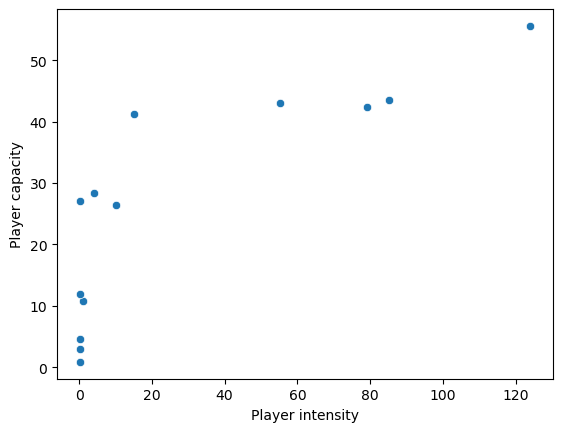

In [28]:
import seaborn as sns

sns.scatterplot(y = 'Player capacity',x = 'Player intensity',data = data_ind)




In [30]:
# Analysing data for the Australian Team
import numpy as np

data_player_filtered = data_player_filtered.replace('-', None)
data_player_filtered = data_player_filtered.dropna()

playing_team_aus = data_player_filtered[data_player_filtered['Career End'] == 2018]

playing_team_aus = playing_team_aus[playing_team_aus['Player'].str.contains('Paine|Marsh|Hazlewood|Cummins|Finch|Handscomb|Harris|Head|Khawaja|Lyon|Siddle|Starc|Tremain')]
data_aus = playing_team_aus.iloc[:,[2,3,4,5,6,7,9,10,11,12,13,14,15]].astype(float)
data_aus['Player'] = playing_team_aus['Player']
data_aus['Player capacity'] = (data_aus['Batting Strike Rate'] * data_aus['Batting Avg'] / 100.)
data_aus['Player intensity'] = (2 * data_aus['Hundreds Scored'] + data_aus['Scores Of Fifty Or More']) + 0.1
data_aus['Player trait'] =  data_aus['Player intensity'] * data_aus['Player capacity'] 
data_aus = data_aus.sort_values(by=['Player trait'], ascending=[0])

display(data_aus)

,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Player,Player capacity,Player intensity,Player trait
269,2013.0,2018.0,96.0,92.0,1.0,3418.0,148.0,37.56,3817.0,89.54,11.0,18.0,8.0,AJ Finch (2013-2018),33.631224,40.1,1348.612082
274,2008.0,2018.0,60.0,59.0,2.0,2312.0,151.0,40.56,2850.0,81.12,6.0,12.0,3.0,SE Marsh (2008-2018),32.902272,24.1,792.944755
283,2011.0,2018.0,53.0,49.0,9.0,1428.0,102.0,35.70,1534.0,93.08,1.0,11.0,4.0,MR Marsh (2011-2018),33.229560,13.1,435.307236
286,2016.0,2018.0,42.0,39.0,2.0,1273.0,128.0,34.40,1414.0,90.02,1.0,10.0,1.0,TM Head (2016-2018),30.966880,12.1,374.699248
297,2009.0,2018.0,35.0,35.0,3.0,890.0,111.0,27.81,1257.0,70.80,1.0,5.0,1.0,TD Paine (2009-2018),19.689480,7.1,139.795308
330,2010.0,2018.0,75.0,38.0,16.0,280.0,52.0,12.72,313.0,89.45,0.0,1.0,6.0,MA Starc (2010-2018),11.378040,1.1,12.515844
388,2012.0,2018.0,15.0,8.0,5.0,50.0,30.0,16.66,59.0,84.74,0.0,0.0,1.0,NM Lyon (2012-2018),14.117684,0.1,1.411768
402,2010.0,2018.0,44.0,13.0,11.0,37.0,11.0,18.50,57.0,64.91,0.0,0.0,1.0,JR Hazlewood (2010-2018),12.008350,0.1,1.200835
346,2011.0,2018.0,42.0,23.0,9.0,166.0,36.0,11.85,246.0,67.47,0.0,0.0,3.0,PJ Cummins (2011-2018),7.995195,0.1,0.799520


<Axes: xlabel='Player intensity', ylabel='Player capacity'>

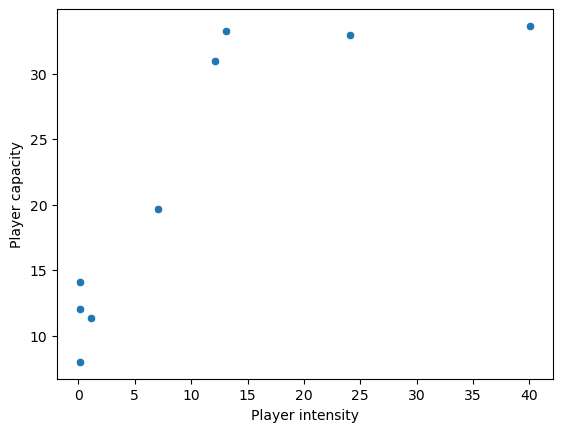

In [31]:
sns.scatterplot(y = 'Player capacity',x = 'Player intensity',data = data_aus)

> Comparing the above two results we find that **Virat Kohli** has the highest chance of being the top scorer as he has the highest **trait** parameter

,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Player,Player capacity,Player intensity,Player trait,Country
992,2008.0,2018.0,216.0,208.0,37.0,10232.0,183.0,59.83,11016.0,92.88,38.0,48.0,12.0,V Kohli (2008-2018),55.570104,124.1,6896.249906,India
993,2004.0,2018.0,329.0,278.0,77.0,9999.0,183.0,49.74,11435.0,87.44,9.0,67.0,9.0,MS Dhoni (2004-2018),43.492656,85.1,3701.225026,India
997,2007.0,2018.0,193.0,187.0,31.0,7454.0,264.0,47.78,8406.0,88.67,21.0,37.0,12.0,RG Sharma (2007-2018),42.366526,79.1,3351.192207,India
1001,2010.0,2018.0,115.0,114.0,6.0,4935.0,137.0,45.69,5234.0,94.28,15.0,25.0,3.0,S Dhawan (2010-2018),43.076532,55.1,2373.516913,India
269,2013.0,2018.0,96.0,92.0,1.0,3418.0,148.0,37.56,3817.0,89.54,11.0,18.0,8.0,AJ Finch (2013-2018),33.631224,40.1,1348.612082,Australia
274,2008.0,2018.0,60.0,59.0,2.0,2312.0,151.0,40.56,2850.0,81.12,6.0,12.0,3.0,SE Marsh (2008-2018),32.902272,24.1,792.944755,Australia
1019,2013.0,2018.0,45.0,40.0,12.0,1447.0,124.0,51.67,1815.0,79.72,3.0,9.0,1.0,AT Rayudu (2013-2018),41.191324,15.1,621.988992,India
283,2011.0,2018.0,53.0,49.0,9.0,1428.0,102.0,35.70,1534.0,93.08,1.0,11.0,4.0,MR Marsh (2011-2018),33.229560,13.1,435.307236,Australia
286,2016.0,2018.0,42.0,39.0,2.0,1273.0,128.0,34.40,1414.0,90.02,1.0,10.0,1.0,TM Head (2016-2018),30.966880,12.1,374.699248,Australia
1014,2009.0,2018.0,144.0,97.0,33.0,1982.0,87.0,30.96,2329.0,85.10,0.0,10.0,5.0,RA Jadeja (2009-2018),26.346960,10.1,266.104296,India


<Axes: xlabel='Player intensity', ylabel='Player capacity'>

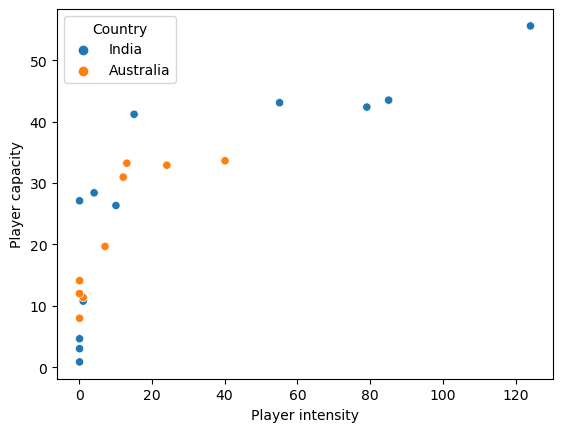

In [32]:
data_ind['Country'] = pd.Series('India' for x in range(len(data_ind))).values
data_aus['Country'] = pd.Series('Australia' for x in range(len(data_aus))).values
dataset_combined = pd.concat([data_ind,data_aus])
display(dataset_combined.sort_values(by = ['Player trait'],ascending = [0]))

sns.scatterplot(y = 'Player capacity',x = 'Player intensity',data = dataset_combined,hue = 'Country')

> The above table also ranks the players based on their expected performance or the highest scorer of the match.
>  The above scatter plot compares both the teams. We can easily predict that the indian players are far ahead of their australian counterparts.

## Highest Fours and Sixes

>  Ranking player based on strike rate this will provide us with the highest number of fours and sixes

In [34]:
display(dataset_combined.sort_values(by = ['Batting Strike Rate'],ascending = [0]))

,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Player,Player capacity,Player intensity,Player trait,Country
1127,2018.0,2018.0,3.0,2.0,0.0,41.0,24.0,20.50,31.0,132.25,0.0,0.0,0.0,RR Pant (2018-2018),27.111250,0.1,2.711125,India
1001,2010.0,2018.0,115.0,114.0,6.0,4935.0,137.0,45.69,5234.0,94.28,15.0,25.0,3.0,S Dhawan (2010-2018),43.076532,55.1,2373.516913,India
283,2011.0,2018.0,53.0,49.0,9.0,1428.0,102.0,35.70,1534.0,93.08,1.0,11.0,4.0,MR Marsh (2011-2018),33.229560,13.1,435.307236,Australia
992,2008.0,2018.0,216.0,208.0,37.0,10232.0,183.0,59.83,11016.0,92.88,38.0,48.0,12.0,V Kohli (2008-2018),55.570104,124.1,6896.249906,India
286,2016.0,2018.0,42.0,39.0,2.0,1273.0,128.0,34.40,1414.0,90.02,1.0,10.0,1.0,TM Head (2016-2018),30.966880,12.1,374.699248,Australia
269,2013.0,2018.0,96.0,92.0,1.0,3418.0,148.0,37.56,3817.0,89.54,11.0,18.0,8.0,AJ Finch (2013-2018),33.631224,40.1,1348.612082,Australia
330,2010.0,2018.0,75.0,38.0,16.0,280.0,52.0,12.72,313.0,89.45,0.0,1.0,6.0,MA Starc (2010-2018),11.378040,1.1,12.515844,Australia
997,2007.0,2018.0,193.0,187.0,31.0,7454.0,264.0,47.78,8406.0,88.67,21.0,37.0,12.0,RG Sharma (2007-2018),42.366526,79.1,3351.192207,India
993,2004.0,2018.0,329.0,278.0,77.0,9999.0,183.0,49.74,11435.0,87.44,9.0,67.0,9.0,MS Dhoni (2004-2018),43.492656,85.1,3701.225026,India
1014,2009.0,2018.0,144.0,97.0,33.0,1982.0,87.0,30.96,2329.0,85.10,0.0,10.0,5.0,RA Jadeja (2009-2018),26.346960,10.1,266.104296,India


> Based on the strike rate we find credible evidence that a player with higher strike rate will hit more sixes and fours. Thus the above table ranks the highest number of sixes or fours scorers

## Bowling predictions

In [40]:
data_bowling = pd.read_csv(r'D:\Cricket-Predictive-Analysis-main\Cricket-Predictive-Analysis-main\Notebooks\ODIs - Bowling.c')
display(data_bowling.head())

,Player,Innings Bowled In,Balls Bowled,Runs Conceded,Wickets Taken,Best Bowling In An Innings,Bowling Avg,Economy Rate,Bowling Strike Rate,Four Wickets In An Innings,Five Wickets In An Innings,200+ Wickets Taken,<35.00 Bowling Avg,<4.00 Economy Rate,<40.00 Bowling Strike Rate
0,JM Anderson (2002-2015),191,9584,7861,269,5/23,29.22,4.92,35.6,11,2,1,1,0,1
1,D Gough (1994-2006),155,8422,6154,234,5/44,26.29,4.38,35.9,10,2,1,1,0,1
2,SCJ Broad (2006-2016),121,6109,5364,178,5/23,30.13,5.26,34.3,9,1,0,1,0,1
3,A Flintoff (1999-2009),116,5496,3968,168,5/19,23.61,4.33,32.7,6,2,0,1,0,1
4,IT Botham (1976-1992),115,6271,4139,145,4/31,28.54,3.96,43.2,3,0,0,1,1,0


In [42]:
data_bowling_sorted = data_bowling[data_bowling['Player'].str.contains('Paine|Marsh|Hazelwood|Cummins|Finch|Hadscomb|Harris|Head|Khawaja|Lyon|Siddle|Starc|Tremain|Kohli|Sharma|Dhawan|Rayudu|Rahul|Pant|Dhoni|Yadav|Shankar|Kumar|Siraj|Chahal|Jadeja|Bumrah')]
data_bowling_sorted = data_bowling_sorted[['Player','Bowling Strike Rate']]
data_bowling_sorted = data_bowling_sorted.replace('-', 0.0)
data_bowling_sorted['Bowling Strike Rate'] = data_bowling_sorted['Bowling Strike Rate'].astype(float)
data_bowling_sorted = data_bowling_sorted[(data_bowling_sorted['Bowling Strike Rate'] != 0) & (data_bowling_sorted['Player'].str.contains('-2018'))]
display(data_bowling_sorted.sort_values(by = ['Bowling Strike Rate'],ascending = [1]))

,Player,Bowling Strike Rate
1019,Kuldeep Yadav (2017-2018),25.4
260,MA Starc (2010-2018),25.9
1011,JJ Bumrah (2016-2018),28.3
1025,YS Chahal (2016-2018),32.2
1005,UT Yadav (2010-2018),33.5
282,PJ Cummins (2011-2018),33.6
1118,MS Dhoni (2004-2018),36.0
1105,AT Rayudu (2013-2018),36.3
300,MR Marsh (2011-2018),38.6
1502,CBRLS Kumara (2017-2018),38.7


#### Based on the bowling strike rate we can predict the highest wicket takers of the match. The above table represents the same. A low bowling strike rate indicates that a bowler takes wickets more frequently. It means that the bowler requires fewer balls, on average, to dismiss a batsman and take a wicket.

For example, if a bowler has a low strike rate of, say, 30, it means that they take a wicket, on average, every 30 balls they bowl. This suggests that they have a good ability to get batsmen out and have a higher likelihood of making breakthroughs in a match.